# Linear regression 

In this exercise you will use linear regression to predict flat prices. One more time, training will be handled via gradient descent. Although, contratry to the first exercise, we will now:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a different loss function.

Let's start with getting the data.

In [1]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2019-03-01 09:16:30--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Translacja www.dropbox.com (www.dropbox.com)... 162.125.70.1, 2620:100:6026:1::a27d:4601
Łączenie się z www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 301 Moved Permanently
Lokalizacja: /s/dl/zey0gx91pna8irj/mieszkania.csv [podążanie]
--2019-03-01 09:16:31--  https://www.dropbox.com/s/dl/zey0gx91pna8irj/mieszkania.csv
Ponowne użycie połączenia do www.dropbox.com:443.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 302 Found
Lokalizacja: https://uc7eb5410fe2e0bc3e0e5f3fb672.dl.dropboxusercontent.com/cd/0/get/AcPUT6VixYi3hd8zt3xqx17g-Lm5vs-fhGSCnx0DeIsEYd4Fbtut1aV90dMYBWBCPwyQRMF62NoXQF9HJb8_ovLHcbNRi6pcNXm5PggULP3z3Q/file?dl=1# [podążanie]
--2019-03-01 09:16:32--  https://uc7eb5410fe2e0bc3e0e5f3fb672.dl.dropboxusercontent.com/cd/0/get/AcPUT6VixYi3hd8zt3xqx17g-Lm5vs-fhGSCnx0DeIsEYd4Fbtut1aV90dMYBWBCPwyQRMF62NoXQF9HJb8_ovLHcbNRi6pcNX

In [2]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilosc_sypialni,ilosc_lazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [55]:
from statistics import mean
from math import log

def msle(ys, ps):
    assert len(ys) == len(ps)
    #################################
    # TODO: Implement this function #
    #################################
    return mean((map(lambda pair: (pair[1]  - pair[0]) ** 2, map(lambda p: log(1 + p), zip(ys, ps)))))

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [5]:
from statistics import mean
###################################################
# TODO: Compute msle for outputing the mean price #
###################################################

def mean_msle(ys):
    m = mean(ys)
    return msle(ys, [m] * len(ys))

Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [104]:
from statistics import mean
from math import log
#############################################
# TODO: Find this constant and compute msle #
#############################################
def basic_msle(ys):
    m = mean(map(log, ys))
    return msle(ys, [m] * len(ys))

In [3]:
import pandas
import numpy
import numpy as np
from math import log

data_file = "mieszkania.csv"
data_f = None


def create_features(filename):
    global data_f
    df = pandas.read_csv(filename)
    data_f = df
    averages = df.groupby(["dzielnica"]).mean()["cena"]
    neighs = list(set(df["dzielnica"]))
    
    xs = []
    ys = []
    
    for i in range(len(df)):
        x = []
        for col in df:
            if col == "dzielnica":
                neighs_l = [0] * len(neighs)
                neighs_l[neighs.index(df[col][i])] = 1
                x.extend(neighs_l)
                continue
            if col == "cena":
                ys.append(df[col][i])
                continue
            x.append(df[col][i])
        x.append(1)
        xs.append(x)
    
    return np.array(xs), np.array(ys)


xs, ys = create_features(data_file)
xs = engineer_features(xs)
ys = np.fromiter(map(lambda y: log(y + 1), ys), dtype=np.float)
N = len(xs)
print(xs[0])

[ 104    0    0  104    0    4    4 1940    1    1    0    1    4]


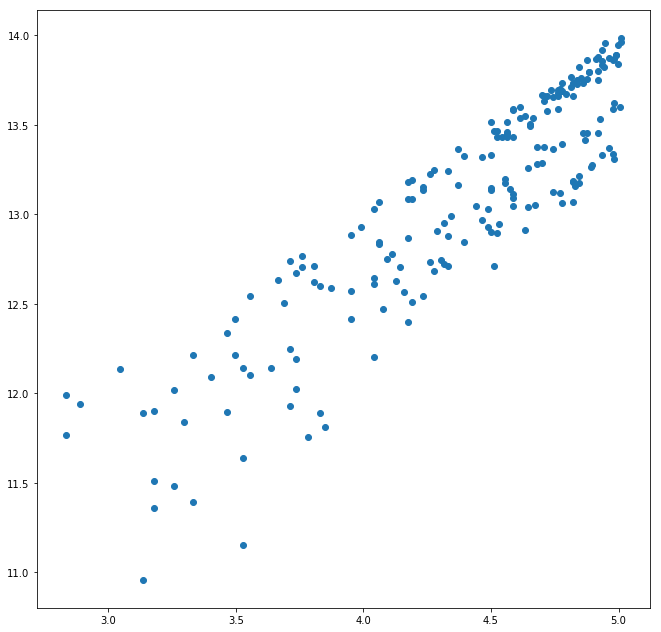

In [39]:
import matplotlib.pyplot as plt
from math import exp, sqrt
import seaborn as sns

data_f = pandas.read_csv("mieszkania_test.csv")
fig = plt.figure(figsize=(11, 11))
plt.scatter(list(map(lambda x: log(x + 1), data_f["m2"].tolist())), 
            list(map(lambda x: log(x + 1), data_f["cena"].tolist())))

Now, let's implement a standard linear regression model. 

In [299]:
import numpy as np
from statistics import mean

##########################################################
# TODO: Implement linear regression and compute its msle #
##########################################################

lr = 0.0000005 # step size

xsT = np.transpose(xs)
n_epochs = 4851 # number of passes over the training data
vec = np.zeros(len(xs[0]))
constant = np.dot(xsT, ys)

def predict(vec, xM=xs):
    return np.dot(xM, vec)

def evaluate(vec, xM=xs, ys=ys):
    prediction = predict(vec)
    diff = ys - prediction
    return np.dot(np.transpose(diff), diff) / len(xs)

losses = []

for i in range(n_epochs):
    loss = evaluate(vec)
    losses.append(loss)
    gradient = (np.dot(xsT, predict(vec)) - constant) / N
    vec -= lr * gradient
    
    if i % (int(n_epochs / 10)) == 0:
        print('Iter: {:>3} Loss: {:8.8f} vec: '.format(i, loss))

Iter:   0 Loss: 168.71228640 vec: 
Iter: 485 Loss: 0.34920506 vec: 
Iter: 970 Loss: 0.33833478 vec: 
Iter: 1455 Loss: 0.32811446 vec: 
Iter: 1940 Loss: 0.31850414 vec: 
Iter: 2425 Loss: 0.30946631 vec: 
Iter: 2910 Loss: 0.30096576 vec: 
Iter: 3395 Loss: 0.29296949 vec: 
Iter: 3880 Loss: 0.28544649 vec: 
Iter: 4365 Loss: 0.27836768 vec: 
Iter: 4850 Loss: 0.27170577 vec: 


Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change the algorithm.
</sup></sub></sup></sub></sup></sub>

In [181]:
#############################################
# TODO: Optimize msle and compare the error #
#############################################
print(basic_msle(ys))

0.3648896122133589


Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

In [2]:
###############################################
# TODO: Implement the feature engieering part #
###############################################
def engineer_features(xs):
    result = []
    for x in xs:
        n = len(x)
        l = list(x)
        for i in range(1, 5):
            # multiplying by area
            l[i] *= x[0]
        l.append(1 if x[5] >= 3 else 0) # rooms for sleeping
        l.append(1 if x[6] >= 2 else 0) # bathrooms
        l.append(x[5] * x[6])
        l[5] **= 2
        l[6] **= 2
        result.append(l)
    return np.array(result)

In [279]:
import numpy as np
from math import exp
##############################################################
# TODO: Test your solution on the training and test datasets #
##############################################################
test_file = "mieszkania_test.csv"

testXs, testYs = create_features(test_file)
testXs = engineer_features(testXs)
testYs = np.fromiter(map(lambda y: log(y + 1), testYs), dtype=np.float)

def error(ps, ys=testYs):
    diff = ps - ys
    return np.dot(np.transpose(diff), diff) / len(ys)

predictions = predict(vec, xM=testXs)

mean_error = error([mean(ys)] * len(ys), ys)
regression_error = evaluate(vec, xM=testXs)
print(mean_error)
print(regression_error)

for i in range(len(predictions)):
    print(exp(predictions[i]), exp(testYs[i]))


0.3648896122133589
0.0685996479714147
2.38904599005407 322227.9999999997
1.9071752879087667 295879.00000000006
1.7251731934011802 306531.0
2.857232990599201 553642.0
7.045926959419039 985348.9999999994
4.802825130548039 695727.0000000002
1.2614388801819223 99751.99999999996
5.3662639767244364 891262.0000000005
2.648553354301068 536499.9999999999
3.567253069839995 527094.0000000005
5.121435205574337 861472.9999999997
3.9110590179999694 701472.9999999995
2.8702165969312365 429776.99999999965
3.5673359833837606 547726.0000000005
4.8619383967449785 669561.0000000002
1.8009207775907492 318363.0
9.065336791547152 1140170.9999999993
1.8208139946213897 341242.9999999997
1.3950380394672028 113580.99999999996
2.3147748648441047 456094.0000000003
3.29122861728505 470730.9999999998
2.4783494503204864 421013.0000000002
4.025388664094748 617319.0
5.29002989444747 796117.9999999994
1.4525617398118864 138901.99999999997
4.854160401538442 857821.0
7.045763194980803 939451.0000000005
2.5053876519859744 